A = 1029.93266063 +/- 0.815410472267
T0 = 4.17322050819 +/- 0.0066230670962


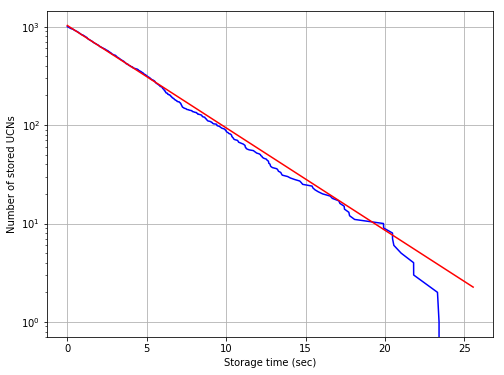

In [124]:
# aliveOutputFile = "../build/alive.out"

# aliveOutputFile = "../models/sun2/storage_simple/data/DIFF_0.0/alive.out"  # simple storage, n_runs = 1000
# aliveOutputFile = "../models/sun2/storage_simple/data/DIFF_0.1/alive.out"  # simple storage, n_runs = 1000

# aliveOutputFile = "../models/sun2/storage_extra/data/DIFF_0.0/alive.out"   # storage with DLC cap, n_runs = 1000
# aliveOutputFile = "../models/sun2/storage_extra/data/DIFF_0.1/alive.out"   # storage with DLC cap, n_runs = 1000

# aliveOutputFile = "../models/sun2/storage_fakeonium/data/DIFF_0.1/300neV/alive.out"  # 300neV, n_runs = 1000
# aliveOutputFile = "../models/sun2/storage_fakeonium/data/DIFF_0.1/250neV/alive.out"  # 250neV, n_runs = 1000
# aliveOutputFile = "../models/sun2/storage_fakeonium/data/DIFF_0.1/200neV/alive.out"  # 200neV, n_runs = 1000
# aliveOutputFile = "../models/sun2/storage_fakeonium/data/DIFF_0.1/150neV/alive.out"  # 150neV, n_runs = 1000
# aliveOutputFile = "../models/sun2/storage_fakeonium/data/DIFF_0.1/105neV/alive.out"  # 105neV, n_runs = 1000

# aliveOutputFile = "../models/sun2/storage_fakeonium/data/DIFF_0.0/300neV/alive.out"  # 300neV, n_runs = 1000
# aliveOutputFile = "../models/sun2/storage_fakeonium/data/DIFF_0.0/200neV/alive.out"  # 200neV, n_runs = 1000
# aliveOutputFile = "../models/sun2/storage_fakeonium/data/DIFF_0.0/109neV/alive.out"  # 109neV, n_runs = 1000
# aliveOutputFile = "../models/sun2/storage_fakeonium/data/DIFF_0.0/105neV/alive.out"  # 105neV, n_runs = 1000

n_runs = 1000

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def file_length(file_name):
    with open(file_name) as f:
        i = -1
        for i, l in enumerate(f):
            pass
        return i+1
    
def storage_model(t, A, T0):
    return A * np.exp(-t/T0)

# Read in alive time output file
n_lines = file_length(aliveOutputFile)
data = np.zeros((n_lines, 7))
with open(aliveOutputFile, 'r') as f:
    for i, line in enumerate(f):
        line_list = line.split(" ")
        alive_time   = float(line_list[0][:-1])
        position_vector_1 = (line_list[1][1:-2]).split(",")
        position_vector_2 = (line_list[2][1:-2]).split(",")
        x1, y1, z1  = np.array(position_vector_1).astype("float")  
        x2, y2, z2  = np.array(position_vector_2).astype("float")  
        data[i,0] = alive_time
        data[i,1] = x1
        data[i,2] = y1
        data[i,3] = z1
        data[i,4] = x2
        data[i,5] = y2
        data[i,6] = z2

alive_times = data[:,0]
death_position = data[:,4:]


t = np.sort(alive_times)
n_UCNs = n_runs - np.arange(1,n_runs+1)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(storage_model, t, n_UCNs, bounds=(0.0, [2.0*n_runs, 1000.0,]))


A = popt[0]
dA = np.sqrt(pcov[0,0])
T0 = popt[1]
dT0 = np.sqrt(pcov[1,1])

print "A = " + str(A) + " +/- " + str(dA)
print "T0 = " + str(T0) + " +/- " + str(dT0)

plt.rcParams["figure.figsize"] = 8, 6

plt.semilogy(t, n_UCNs, 'b')
plt.semilogy(t, storage_model(t, A, T0), 'r')
plt.xlabel("Storage time (sec)")
plt.ylabel("Number of stored UCNs")
plt.grid()
plt.show()


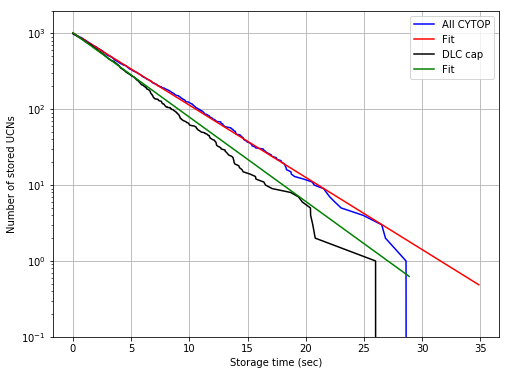

In [111]:
# t1 = t
# n1 = n_UCNs
# n1f = storage_model(t, A, T0)

# t2 = t
# n2 = n_UCNs
# n2f = storage_model(t, A, T0)

legend = ["All CYTOP", "Fit", "DLC cap", "Fit"]

plt.semilogy(t1, n1, 'b')
plt.semilogy(t1, n1f, 'r')
plt.semilogy(t2, n2, 'k')
plt.semilogy(t2, n2f, 'g')
plt.legend(legend)
plt.xlabel("Storage time (sec)")
plt.ylabel("Number of stored UCNs")
plt.ylim((0.1,2e3))
plt.grid()
plt.show()

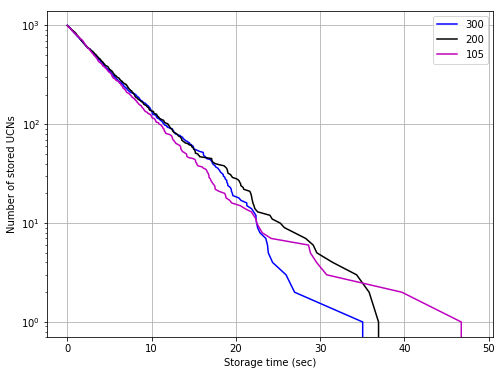

In [51]:
# t300 = t
# n300 = n_UCNs
# n300f = storage_model(t, A, T0)

# t250 = t
# n250 = n_UCNs
# n250f = storage_model(t, A, T0)

# t200 = t
# n200 = n_UCNs
# n200f = storage_model(t, A, T0)

# t150 = t
# n150 = n_UCNs
# n150f = storage_model(t, A, T0)

# t105 = t
# n105 = n_UCNs
# n105f = storage_model(t, A, T0)

# legend = ["300", "250", "200", "150", "105"]
legend = ["300", "200", "105"]

plt.semilogy(t300, n300, 'b')
# plt.semilogy(t250, n250, 'r')
plt.semilogy(t200, n200, 'k')
# plt.semilogy(t150, n150, 'g')
plt.semilogy(t105, n105, 'm')
plt.legend(legend)
plt.xlabel("Storage time (sec)")
plt.ylabel("Number of stored UCNs")
plt.grid()
plt.show()

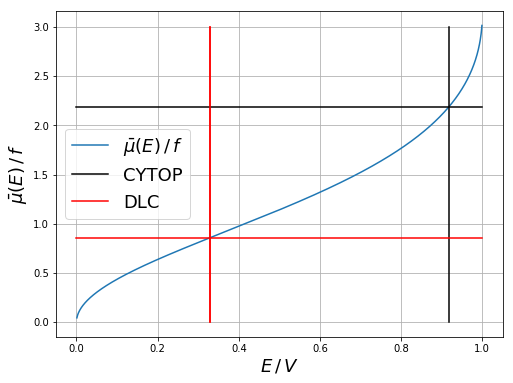

In [104]:
x = np.linspace(0.001,0.999,1000)
y = 2*(1/x*np.arcsin(np.sqrt(x))-np.sqrt(1/x-1))
def mu(x):
    return 2*(1/x*np.arcsin(np.sqrt(x))-np.sqrt(1/x-1))
plt.plot(x,y)

plt.plot([100./109., 100./109.], [0., 3.0], 'k')

plt.plot([100./305., 100./305.], [0., 3.0], 'r')

plt.plot([0,1], [mu(100./109.), mu(100./109.)], 'k')

plt.plot([100./305., 100./305.], [0., 3.0], 'r')
plt.plot([0,1], [mu(100./305.), mu(100./305.)], 'r')

plt.xlabel(r"$E \,/\,V$", fontsize=18)
plt.ylabel(r"$\bar{\mu}(E)\, / \, f$", fontsize=18)

plt.legend([r"$\bar{\mu}(E)\, / \, f$", "CYTOP", "DLC"], fontsize=18)
plt.grid()
plt.show()

In [115]:
45*45*np.pi*2 + 500*90*np.pi

154095.11965857935

In [117]:
fa1 = 45*45*np.pi/(45*45*np.pi*2 + 500*90*np.pi)

In [118]:
tau1 = 1/(mu(100./109.))
tau2 = 1/(fa1*mu(100./305) + (1-fa1)*mu(100./109.))


In [121]:
(tau1-tau2)/tau1

-0.025799571899381864